In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import utils

In [2]:
num_agents = 200
num_iterations = 100
params_names = ['CAThetaCutBarrel', 'CAThetaCutForward', 'dcaCutInnerTriplet', 'dcaCutOuterTriplet']
params_lb = [0.0, 0.0, 0.0, 0.0]
params_ub = [0.006, 0.03, 0.2, 1.0]

In [3]:
default_params = [0.0020000000949949026, 0.003000000026077032, 0.15000000596046448, 0.25]
default_metrics = utils.get_metrics(uproot.open('default.root'), 0)

In [8]:
metrics = []
for i in range(num_iterations):
    file = uproot.open('history/validation/iteration' + str(i) + '.root')
    temp = []
    for j in range(num_agents):
        fitness = utils.get_metrics(file, j)
        temp.append(fitness)
    metrics.append(np.transpose(temp))
    
    file.close()


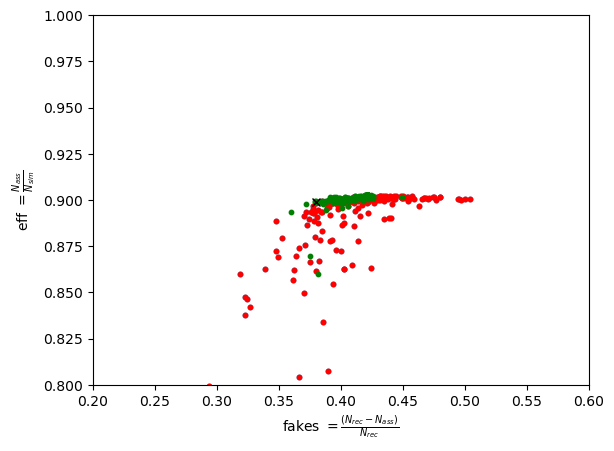

In [9]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

def animate(i):
    fig.clear()
    ax = fig.add_subplot(111)
    ax.set_xlim(0.2, 0.6)
    ax.set_ylim(0.8, 1)
    s = ax.scatter(metrics[0][1], 1 - metrics[0][0], s=10)
    s = ax.scatter(metrics[i][1], 1 - metrics[i][0], c="red", s=10)
    s = ax.scatter(metrics[num_iterations - 1][1], 1 - metrics[num_iterations - 1][0], c="green", s=10)
    s = ax.plot([default_metrics[1]], [1 - default_metrics[0]], 'x', color='black')
    ax.set_xlabel(r'fakes $=\frac{(N_{rec}-N_{ass})}{N_{rec}}$')
    ax.set_ylabel(r'eff $=\frac{N_{ass}}{N_{sim}}$')
    # ax.legend(loc='best')

ani=animation.FuncAnimation(fig, animate, interval=200, frames=range(num_iterations))
ani.save('history/metrics.gif', writer='pillow')


In [10]:
params = []
for i in range(num_iterations):
    temp = utils.read_csv("history/parameters/iteration" + str(i) + ".csv")
    params.append(np.transpose(temp))

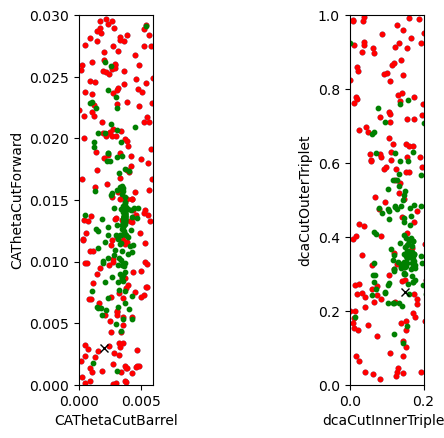

In [11]:
fig, ax = plt.subplots()

def animate(i):
    fig.clear()
    ax = fig.add_subplot(121, aspect='equal')
    ax.set_xlim(params_lb[0], params_ub[0])
    ax.set_ylim(params_lb[1], params_ub[1])
    s = ax.scatter(params[0][0], params[0][1], s=10)
    s = ax.scatter(params[i][0], params[i][1], c="red", s=10)
    s = ax.scatter(params[num_iterations - 1][0], params[num_iterations - 1][1], c="green", s=10)
    s = ax.plot(default_params[0], default_params[1], c="black", marker="x")
    ax.set_xlabel(params_names[0])
    ax.set_ylabel(params_names[1])
    ax = fig.add_subplot(122, aspect='equal')
    ax.set_xlim(params_lb[2], params_ub[2])
    ax.set_ylim(params_lb[3], params_ub[3])
    s = ax.scatter(params[0][2], params[0][3], s=10)
    s = ax.scatter(params[i][2], params[i][3], c="red", s=10)
    s = ax.scatter(params[num_iterations - 1][2], params[num_iterations - 1][3], c="green", s=10)
    s = ax.plot(default_params[2], default_params[3], c="black", marker="x")
    ax.set_xlabel(params_names[2])
    ax.set_ylabel(params_names[3])

ani=animation.FuncAnimation(fig, animate, interval=200, frames=range(num_iterations))
ani.save('history/params.gif', writer='pillow')

In [4]:
pareto_front = utils.read_csv('history/pareto_front.csv')
pareto_front = pareto_front[pareto_front[:, 5].argsort()]
pareto_x = [particle[5] for particle in pareto_front]
pareto_y = [1 - particle[4] for particle in pareto_front]

In [5]:
len(pareto_front)

3725

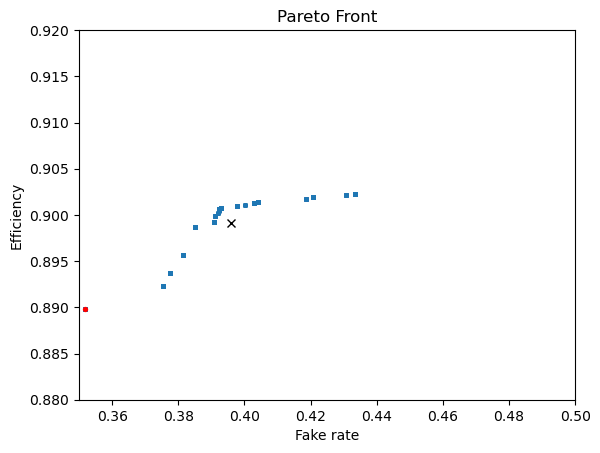

In [18]:
point1 = pareto_front[600]
point2 = pareto_front[2100]
point3 = pareto_front[3700]


plt.scatter(pareto_x, pareto_y, s=5)
plt.plot(default_metrics[1], 1 - default_metrics[0], 'x', color='black')
# plt.scatter([point1[5], point2[5], point3[5]], [1 - point1[4], 1 - point2[4], 1 - point3[4]], color='red', s=8)
plt.scatter(point1[5], 1 - point1[4], color='red', s=8)
plt.xlim(0.35, 0.5)
plt.ylim(0.88, 0.92)
plt.xlabel("Fake rate")
plt.ylabel("Efficiency")
plt.title("Pareto Front")
plt.show()

In [12]:
print([point1[i] for i in range(4)])
print([point2[i] for i in range(4)])
print([point3[i] for i in range(4)])

[0.0015700991742126132, 0.0029278843004851385, 0.08348585609602202, 0.34534114796994364]
[0.0019086171948215086, 0.0031911068394530795, 0.09165982466544736, 0.49331810621470706]
[0.0019056834432851686, 0.0062456718454562705, 0.12238785749152586, 0.5004785698978634]


In [17]:
print(point1)
print(point2)
print(point3)

[0.00130857 0.00434518 0.15850845 0.57885402 0.09907329 0.40152204]
[0.0015785  0.00643411 0.15649558 0.58778063 0.09772536 0.4341834 ]
[0.00216951 0.00633777 0.15881853 0.52676336 0.09738837 0.46294754]
